##Data Analysis on marketing campaign conducted by Portuguese banking institution.

 The marketing campaigns were based on phone calls and other contact to the clients, in order to find if the product (bank term deposit) would be subscribed or not.

We did a initial analysis with bank-full.csv which had the information about the campaign along with client profile and if the client has subscribed to bank deposit after the campaign or not.

Data on number of previous contact for the client and outcome as in how many was success. From this information we see  that lot of clients who subscribed to term deposit in last campaign were contacted only once.

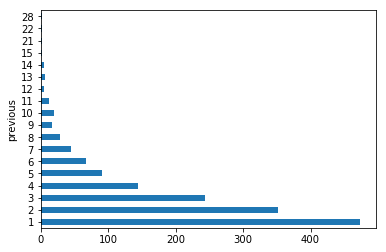

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections

df = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstoneproject/bank/bank-full.csv',delimiter=";")

df.loc[df["poutcome"] == 'success','previous'].groupby(df['previous']).size().plot(kind = 'barh')



In [98]:
total_num_client_subscribed = df.loc[df['y'] == 'yes'].y.count()


5289

Among the total number of clients subscribed to term deposit only small fraction of people are self-employed and who have already taken both loans have subscribed to term deposit. 

In [80]:
self_employed_client = df.loc[(df["job"] == 'self-employed')& (df["loan"] == 'yes') & (df['housing'] == 'yes') & (df['y'] == 'yes')].job.count()
self_employed_client

13

In [89]:
percentage = (self_employed_client/total_num_client_subscribed) *100
percentage


0.24579315560597464

In [90]:
df1 = df.loc[(df["job"] == 'self-employed')& (df["loan"] == 'yes') & (df['housing'] == 'yes') & (df['y'] == 'yes')]
df1.loc[df1['balance'] > 0].job.count()

9

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
#The range of balance amount the account ranges from -8019 to 102127
df['balance'].max() 


102127

In [35]:
df['balance'].min()

-8019

In [19]:
# Clients who have subscribed to term deposit whose balance amount is less than 0
df.loc[(df['y']== 'yes') & (df["balance"] <= 0)].age.count()


502

In [23]:
# Number of clients who have positive balance on their accounts who have subscribed to term deposit
df.loc[(df['y']== 'yes') & (df["balance"] > 0)].balance.count()


4787

Job information of clients who were contacted for this campaign, blue collar job clients ranks the majority among other jobs

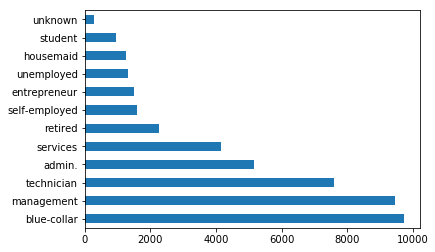

In [22]:
#Job information of the clients contacted for this campaign
df['job'].value_counts().plot(kind='barh')


In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Distribution of clients who have subscribed to term deposit displayed based on the age.
From the below graph we can see clients between the age of 28 to 36 who are the majors ones who have subscribed to term deposit

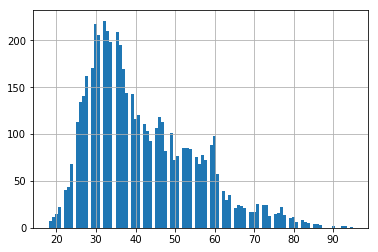

In [77]:
#Clients who have subscribed to term deposit displayed based on their age
df['res'] = df.loc[df['y'] == 'yes', 'age']
df['res'].hist(bins = 100)

Analysing if there are clients who have subscribed to term deposit who is unemployed or whose job category is unknown.
From the below information it looks like the clients who subscribed to term deposit are employed and we don have any one subscribed to term deposit who are unemployed.

In [22]:

df.loc[(df['y']== 'yes') & (df["job"] == 'unemployed') & (df['job'] == 'unknown')].job.count()


0

From the given data we have around 55 students who are subscribed to term deposit and mostly full time employees are ones who have subscribed to term deposit

In [63]:
#Total number of clients who are either students or part time workers who have subscribed to term deposit
sum(df['res'].between(0,21))

55

In [62]:
# Total number of Customers with age more than 20 who have subscribed for term deposit
sum(df['res'].between(21,100))

5256

Graph which shows clients who have subscribed to term deposit and their job categories
From the below information the clients in management jobs seem to be subscribing to term deposit then other categories
Top three jobs for which term deposit are larger are Management, Technician,blue-collar jobs

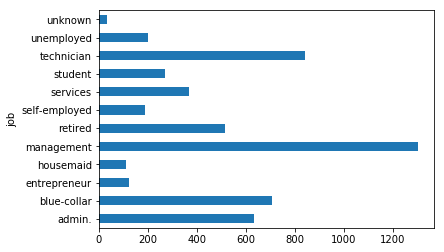

In [60]:
# clients subscribed to term deposit and their job category
df.loc[df['y'] == 'yes','job'].groupby(df['job']).size().plot(kind = 'barh')


Data on customers who has both housing loan and personal loan and who have subcribed to term deposit
Of total of 5289 clients who have subscribed to term deposit the amount of client who have both loan,housing loan and term deposit is only 5%


In [21]:
#client subscribed to deposit who has both the loans
df.loc[(df['y']== 'yes') & (df["loan"] == 'yes') & (df['housing'] == 'yes')].job.count()

265

In [20]:
#Total number of clients who have subscribed to term deposit
(df.loc[df['y'] == 'yes']).y.count()

5289

Marital status of the clients who have subscribed to term deposit.
According to the information the clients who are married seem have largest number of term depsoit than single status clients

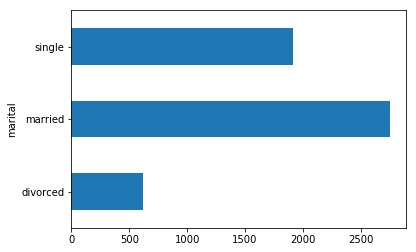

In [2]:
df.loc[df['y'] == 'yes','marital'].groupby(df['marital']).size().plot(kind = 'barh')


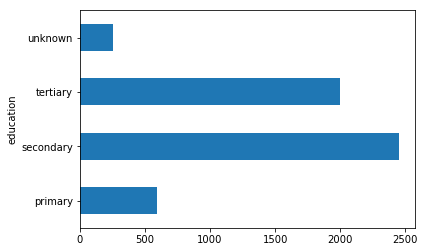

In [53]:
# The education of client who have subscribed to term deposit
df.loc[df['y'] == 'yes','education'].groupby(df['education']).size().plot(kind = 'barh')


From the above graph the clients who have secondary degree have subscribed to term deposit more than other categories

In [51]:
#Total number of default credit card payment 
df.groupby(["default", "y"]).size()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
dtype: int64

In [100]:
#The number of client whose outcome of the previous marketing campaign was success who also have subscribed to term deposit
last_this = df.loc[(df['y']== 'yes') & (df["poutcome"] == 'success') ].age.count()
last_this

978

In [101]:
(last_this/total_num_client_subscribed)*100


18.491208167895632

In [40]:
# Total count of campaign done this year
sum(df.loc[df['y'] == 'yes','campaign'].between(0,63))

5289

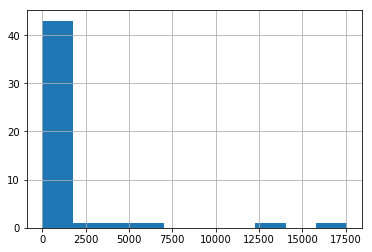

In [7]:
#number of contacts performed during this campaign and for this client 
df['campaign'].value_counts().hist()

In [16]:
#collecting the metrics on people subscribed to term deposit and number of customers being contacted monthly
df12 = df.loc[df['y'] == 'yes'].groupby(["month"]).size().reset_index()
df12.columns = ["month","size"]

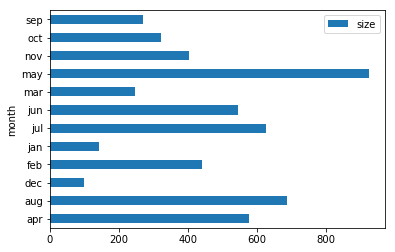

In [17]:
df12.plot(kind='barh',x = 'month',y = 'size')

Month of may has largest number of customers who have subscribed for term despoist, even though the fiscal year in portugal is from jan to dec the term deposit seems to be more on month of May.

In [7]:
# Collecting the information about the people who has subscribed for term deposit and their contact mode
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

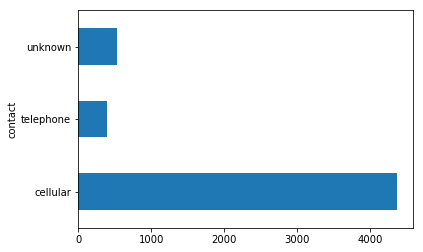

In [11]:

df.loc[df['y'] == 'yes','contact'].groupby(df['contact']).size().plot(kind = 'barh')
#Among the different contact type the person contacted via cellphone has more number of chances for subscribing for term deposit

From the given data we can observe that the clients who have management jobs with secondary degree and who doesnt have any loans and in between age of 27 to 37 are the ones who have subscribed to term deposit the most.

Protugal has fiscal year from January to December and we expected the term deposit to be more during these months but it turned out that during month of May there are more number of clients subscribing to term deposit. 
It may be due to performance apparisal cycle or bonus pay cycle but we dont have substantial information to confirm this theory.

We have around 18 percent of clients who have subscribed to term deposit after pervious campaign and current campaign.

From the campaign results  its clear that unemployed clients are not susbcribing to term deposit.
Students contribute to very low percentage of clients who subscribed to term deposit.

From our initail analysis clients who are married and who have management/blue collar and those who are finanically stable are the clients who subscribe for term deposit.

With the given data we can find that for a successful campaign the category of clients we need to contact and  for category of clients are not subscribing.

This gives us the areas which we need to improve for making more clients to subscribe to term deposit.